### Problem Statement

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the required dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test_QoiMO9B.csv')
meal = pd.read_csv("meal_info.csv")
centre = pd.read_csv("fulfilment_center_info.csv")


In [3]:
train.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270


In [4]:
centre.head(2)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7


In [5]:
meal.head(2)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai


In [6]:
test.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0


In [7]:
# Join train and Test
combined = pd.concat([train, test], ignore_index = True)

In [8]:
# Join the Centre

combined = pd.merge(combined, centre, on = "center_id", how = "left")
combined = pd.merge(combined, meal, on = "meal_id", how = "left")

In [9]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian


In [10]:
# Online Activity
combined["Online Activity"] = combined["emailer_for_promotion"]+combined["homepage_featured"]

In [11]:
# Lets Create a New Feature Called Discount

combined["Discount"] = np.abs(combined.base_price - combined.checkout_price)

In [12]:
combined.Discount.describe()

count    489121.000000
mean         22.374939
std          47.544701
min           0.000000
25%           1.000000
50%           1.000000
75%          14.550000
max         820.590000
Name: Discount, dtype: float64

In [13]:
# Apply t test to verify
import scipy.stats as stats

In [14]:
stats.ttest_ind(combined.Discount, combined.num_orders)

Ttest_indResult(statistic=nan, pvalue=nan)

In [15]:
combined.loc[:, ["Discount", "num_orders", "base_price", "checkout_price"]].corr()

,Discount,num_orders,base_price,checkout_price
Discount,1.000000,0.153774,0.299764,0.002163
num_orders,0.153774,1.000000,-0.222306,-0.282108
base_price,0.299764,-0.222306,1.000000,0.954192
checkout_price,0.002163,-0.282108,0.954192,1.000000


In [16]:
combined.loc[:, ["Discount", "num_orders", "base_price", "checkout_price"]].describe()

,Discount,num_orders,base_price,checkout_price
count,489121.000000,456548.000000,489121.000000,489121.000000
mean,22.374939,261.872760,354.312259,332.879277
std,47.544701,395.922798,160.352168,153.022073
min,0.000000,13.000000,55.350000,2.970000
25%,1.000000,54.000000,243.500000,228.010000
50%,1.000000,136.000000,311.430000,299.760000
75%,14.550000,324.000000,458.810000,445.230000
max,820.590000,24299.000000,1112.620000,1113.620000


<AxesSubplot:xlabel='base_price'>

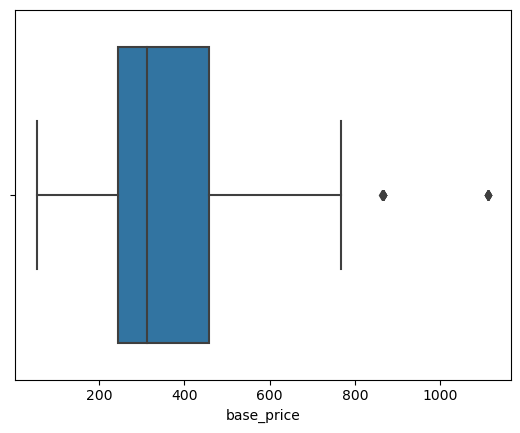

In [17]:
sns.boxplot(combined.base_price)

<AxesSubplot:xlabel='checkout_price'>

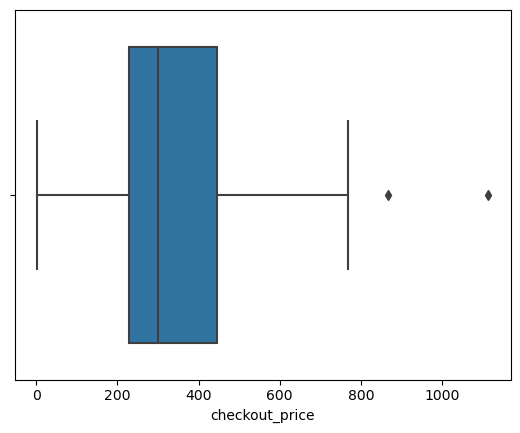

In [18]:
sns.boxplot(combined.checkout_price)

<AxesSubplot:xlabel='Discount'>

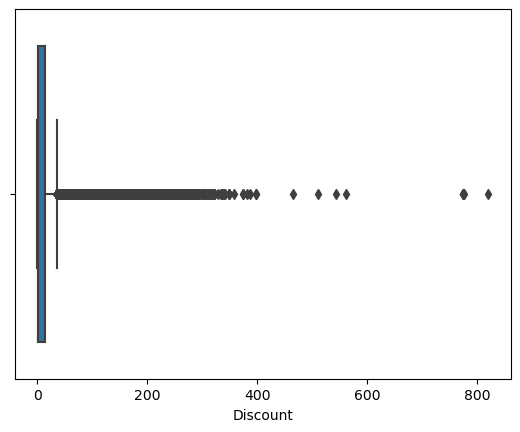

In [19]:
sns.boxplot(combined.Discount)

<AxesSubplot:xlabel='num_orders'>

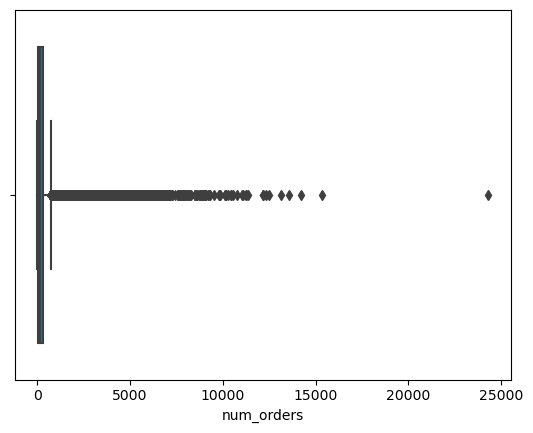

In [20]:
sns.boxplot(combined.num_orders)

In [21]:
combined.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,Online Activity,Discount
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,0,15.46
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00


In [22]:
combined.select_dtypes(include = "object").columns

Index(['center_type', 'category', 'cuisine'], dtype='object')

In [23]:
cat = ['center_type', 'category', 
       'cuisine', "city_code", "region_code", "Online Activity"]

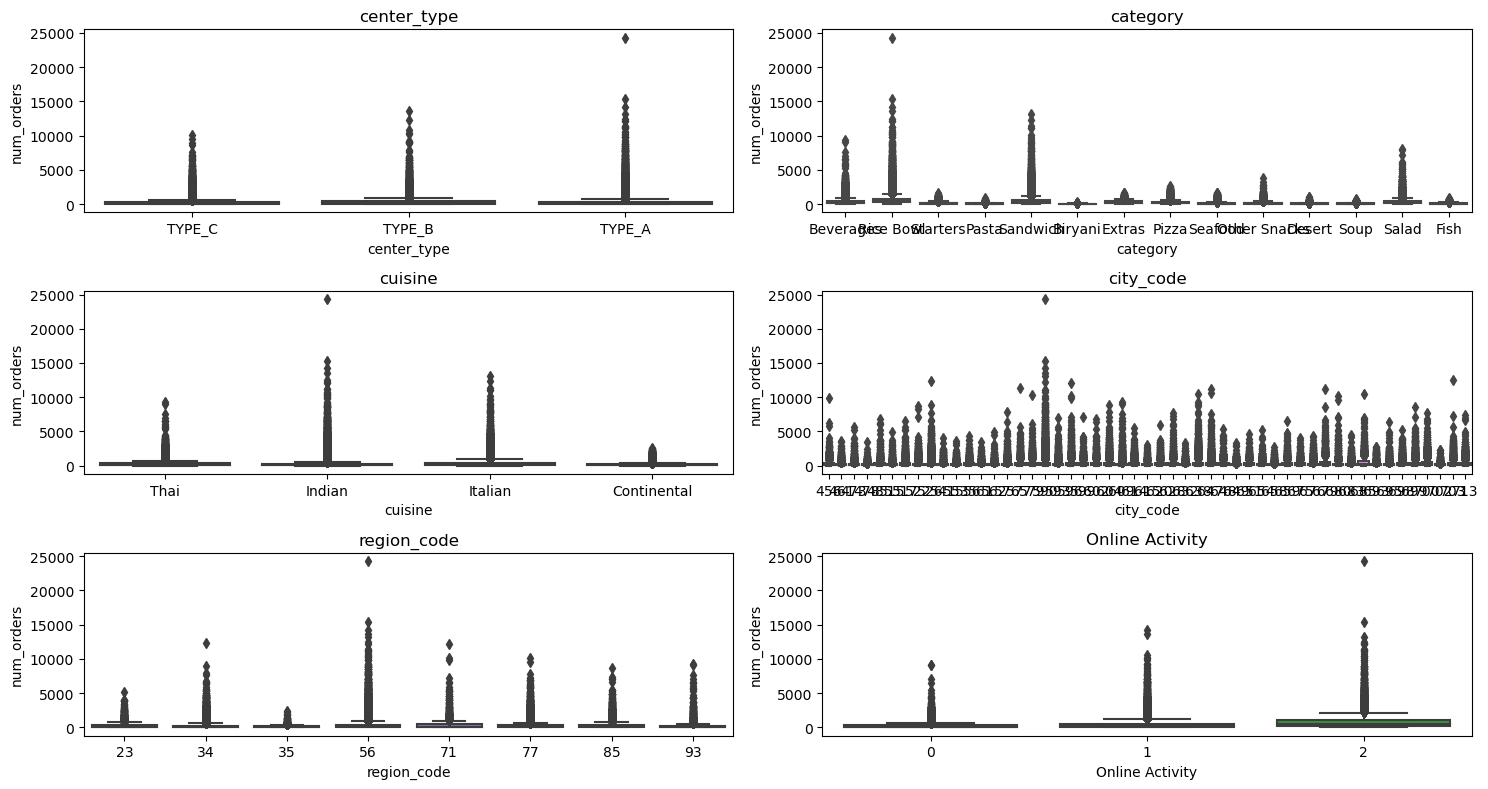

In [24]:
nrows = 3
cols = 2
repeat = 1

plt.figure(figsize=(15, 8))
for i in cat:
    plt.subplot(nrows, cols, repeat)
    sns.boxplot(combined.loc[:, i], combined.num_orders)
    plt.title(i)
    repeat+=1
    
plt.tight_layout()
plt.show()

In [25]:
# Count of Orders Basis Centre ID

combined.groupby("center_id")["num_orders"].describe()

,count,mean,std,min,25%,50%,75%,max
center_id,,,,,,,,
10,7015.0,481.969779,553.419756,13.0,134.0,296.0,663.00,13580.0
11,6801.0,411.307161,548.072258,13.0,80.0,204.0,609.00,11260.0
13,7046.0,609.784984,731.416171,13.0,148.0,337.0,810.75,10745.0
14,6041.0,197.832809,261.084555,13.0,41.0,108.0,271.00,5170.0
17,6333.0,192.376283,222.382752,13.0,42.0,121.0,270.00,3604.0
...,...,...,...,...,...,...,...,...
161,5591.0,145.581828,172.940572,13.0,41.0,95.0,188.00,2726.0
162,4366.0,155.807375,223.785532,13.0,40.0,95.0,188.00,4009.0
174,6891.0,405.251342,567.552153,13.0,82.0,189.0,499.00,7749.0


In [26]:
combined["centre_wise_meal_count"] = combined.groupby("center_id")["num_orders"].transform("count")
combined["centre_wise_meal_avg"] = combined.groupby("center_id")["num_orders"].transform("mean")
combined["centre_wise_meal_std"] = combined.groupby("center_id")["num_orders"].transform("std")
combined["centre_wise_meal_median"] = combined.groupby("center_id")["num_orders"].transform("median")
combined["centre_wise_meal_max"] = combined.groupby("center_id")["num_orders"].transform("max")

In [27]:
combined.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,op_area,category,cuisine,Online Activity,Discount,centre_wise_meal_count,centre_wise_meal_avg,centre_wise_meal_std,centre_wise_meal_median,centre_wise_meal_max
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,...,2.0,Beverages,Thai,0,15.46,5146,163.475709,221.363317,95.0,3280.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,...,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0


In [28]:
# Count the Number of Orders Per meal_id
combined.groupby("meal_id")["num_orders"].describe()

,count,mean,std,min,25%,50%,75%,max
meal_id,,,,,,,,
1062,11137.0,423.165574,245.955526,13.0,256.00,366.0,539.00,2539.0
1109,11134.0,571.921412,526.852795,13.0,258.00,431.0,701.00,6479.0
1198,4206.0,242.101759,191.285165,13.0,107.00,188.0,334.00,1203.0
1207,10806.0,166.653341,144.606583,13.0,80.00,134.0,204.00,2011.0
1216,9695.0,55.034966,43.941466,13.0,26.00,42.0,69.00,690.0
1230,10746.0,171.595850,148.641426,13.0,69.00,135.0,216.00,1905.0
1247,7184.0,32.279649,22.600579,13.0,14.00,27.0,41.00,204.0
1248,9939.0,88.011872,98.923101,13.0,40.00,55.0,107.00,2323.0
1311,4682.0,318.171935,256.900863,13.0,135.00,231.0,431.75,1620.0


In [29]:
# Count of Num of Orders Basis Meal ID

combined["meal_wise_meal_count"] = combined.groupby("meal_id")\
["num_orders"].transform("count")

combined["meal_wise_meal_avg"] = combined.groupby("meal_id")\
["num_orders"].transform("mean")

combined["meal_wise_meal_std"] = combined.groupby("meal_id")\
["num_orders"].transform("std")

combined["meal_wise_meal_median"] = combined.groupby("meal_id")\
["num_orders"].transform("median")

combined["meal_wise_meal_max"] = combined.groupby("meal_id")\
["num_orders"].transform("max")

In [30]:
# Count the Number of Orders Per Week Number
combined["week_wise_meal_count"] = combined.groupby("week")["meal_id"].transform("count")

In [31]:
pd.set_option("display.max_columns", 90)
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,Online Activity,Discount,centre_wise_meal_count,centre_wise_meal_avg,centre_wise_meal_std,centre_wise_meal_median,centre_wise_meal_max,meal_wise_meal_count,meal_wise_meal_avg,meal_wise_meal_std,meal_wise_meal_median,meal_wise_meal_max,week_wise_meal_count
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,0,15.46,5146,163.475709,221.363317,95.0,3280.0,11092,752.456365,631.487648,567.0,9303.0,2922
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0,11116,598.853544,457.266268,473.0,5899.0,2922
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0,10451,309.494594,271.655936,230.0,4077.0,2922
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,0,98.03,5146,163.475709,221.363317,95.0,3280.0,8899,42.813462,32.591487,28.0,325.0,2922
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,0,1.00,5146,163.475709,221.363317,95.0,3280.0,10458,104.239051,99.314171,80.5,1945.0,2922


In [32]:
# Num of Orders Basis City
combined.groupby(["city_code", "region_code"])["num_orders"].describe()

,,count,mean,std,min,25%,50%,75%,max
city_code,region_code,,,,,,,,
456,56,6716.0,288.448630,390.073103,13.0,54.0,161.0,365.0,9828.0
461,34,5763.0,200.965469,235.317055,13.0,54.0,136.0,271.0,3590.0
473,77,5855.0,207.511870,285.284336,13.0,53.0,134.0,271.0,5697.0
478,77,5021.0,126.972117,153.194944,13.0,40.0,82.0,175.0,3456.0
485,77,5712.0,254.034664,357.761464,13.0,54.0,163.0,338.0,6777.0
515,77,5085.0,175.812979,247.225252,13.0,40.0,107.0,231.0,4861.0
517,56,13109.0,244.531925,315.567725,13.0,54.0,148.0,324.0,6575.0
522,56,13459.0,250.828813,352.084063,13.0,54.0,134.0,311.0,8762.0
526,34,43525.0,211.555497,307.633139,13.0,53.0,122.0,270.0,12327.0


In [33]:
# Count of Orders Basis City

combined["city_wise_meal_count"] = combined.groupby("city_code")\
["num_orders"].transform("count")

combined["city_wise_meal_avg"] = combined.groupby("city_code")\
["num_orders"].transform("mean")

combined["city_wise_meal_std"] = combined.groupby("city_code")\
["num_orders"].transform("std")

combined["city_wise_meal_median"] = combined.groupby("city_code")\
["num_orders"].transform("median")

combined["city_wise_meal_max"] = combined.groupby("city_code")\
["num_orders"].transform("max")


In [34]:
# Count of Orders basis Region

combined["region_wise_meal_count"] = combined.groupby("region_code")\
["meal_id"].transform("count")

combined.drop(["region_wise_meal_avg", "region_wise_meal_std",
              "region_wise_meal_median", "region_wise_meal_max"], axis = 1, inplace = True)

KeyError: "['region_wise_meal_avg', 'region_wise_meal_std', 'region_wise_meal_median', 'region_wise_meal_max'] not found in axis"

In [ ]:
# Scatterplot
sns.scatterplot(combined.op_area, combined.num_orders)

In [ ]:
# Area wise Num of Orders
combined["op_area_order_count"] = combined.groupby("op_area")\
["num_orders"].transform("count")

combined["op_area_order_avg"] = combined.groupby("op_area")\
["num_orders"].transform("mean")

combined["op_area_order_std"] = combined.groupby("op_area")\
["num_orders"].transform("std")

combined["op_area_order_median"] = combined.groupby("op_area")\
["num_orders"].transform("median")

combined["op_area_order_max"] = combined.groupby("op_area")\
["num_orders"].transform("max")

In [ ]:
combined["op_area_meal_count"] = combined.groupby("op_area")\
["meal_id"].transform("count")

In [ ]:
# Op Area - Clustering and Generate the Cluster Labels....

# Draw my clusters on op_area, num_orders, base price and checkout price

subset = combined.loc[:, ["op_area", "base_price", "checkout_price"]]

In [ ]:
# Lets Scale the Dataset
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
scaled = pd.DataFrame(robust.fit_transform(subset), columns = subset.columns)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans(random_state = 42)

elbow = KElbowVisualizer(estimator = kmeans)

In [ ]:
elbow.fit(scaled)
elbow.show()

In [ ]:
# Applying KMeans Clustering on Combined Dataset/Scaled
kmeans = KMeans(n_clusters=4, random_state =42)

# Scaling plays an important role if there are outliers in the data
kmeans.fit_transform(scaled) 

combined["cluster_labels"] = kmeans.labels_

In [ ]:
sns.boxplot(x = "cluster_labels", y="num_orders", data = combined)

In [ ]:
combined.head()

In [ ]:
# heatmap correlation....

plt.figure(figsize = (20, 20))
sns.heatmap(combined.drop(["id", "week", "center_id", "meal_id", 
                           "Online Activity","city_code","region_code","op_area"], axis = 1).corr(), \
            annot = True, cmap = "afmhot_r")
plt.show()

In [ ]:
combined["city_wise_metrics"] = combined.loc[:, ["city_wise_meal_avg", "city_wise_meal_median",
                                                "city_wise_meal_max"]].median(axis = 1)

In [ ]:
# Outlier Removal
# Checking Correlation Post Outliers
# Creating Summary Metrics Variable basis the Variables Created - Optional